## Problem Statement

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#To use regular expressions
import re

#To use NLTK
import nltk

#For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

#For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

#For BOW and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#For encoding the category variable
import category_encoders as ce 

# For ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform Train Test Split
from sklearn.model_selection import train_test_split

#Performance Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /Users/aryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aryan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('./data/flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.Category.unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

In [5]:
df['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

In [6]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

## Data Exploration

Shape of the dataset

In [7]:
print(f'No of rows: {df.shape[0]}')

No of rows: 2225


Number of news article per category

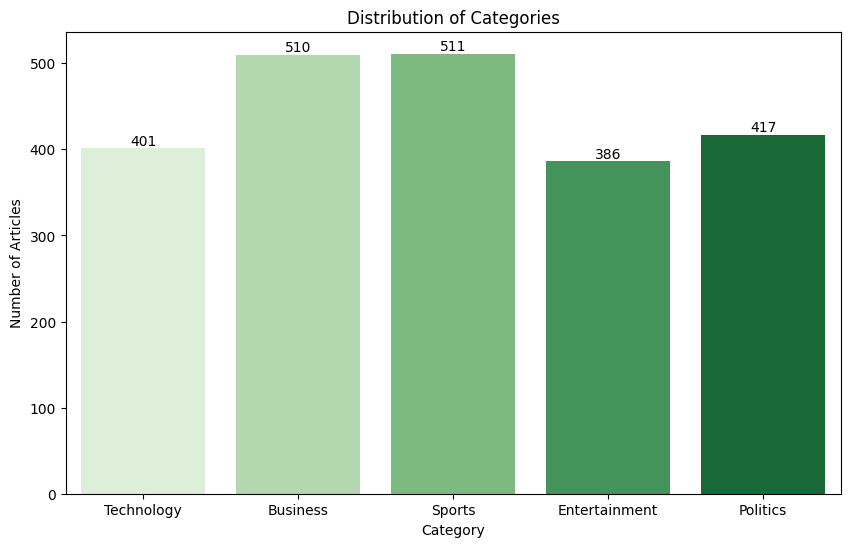

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Category', data = df, palette='Greens')

ax.bar_label(ax.containers[0])

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')

plt.show()

Most of the news articles in the dataset are from Business and Sports category

## Text Processing

In [9]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [10]:
stop_words = list(stopwords.words('english'))

def text_process(sent):
    # Removing non-letters
    sent = re.sub('[^a-zA-Z]',' ',sent)

    #Word tokenizing the text
    words = nltk.word_tokenize(sent)

    # Removing stopwords
    filtered_sent = [word for word in words if not word in stop_words]
    
    # lemmatizer
    lemmatizer = WordNetLemmatizer()
    new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
    new_txt = " ".join(new_txt)

    return new_txt

df['Article'] = df['Article'].apply(text_process)

After processing

In [11]:
df['Article'][0]

'tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel 

## Data Transformation

Encoding the category varibale using Ordinal Encoding from category encoders

In [12]:
encode = ce.OrdinalEncoder(cols = ['Category'])
df = encode.fit_transform(df)

Outcome after encoding

Category:

- 1 - Technology
- 2 - Business
- 3 - Sports
- 4 - Entertainment
- 5 - Politics

In [13]:
df.head()

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...


### Bag of Words / TF-IDF

We need to give user the option to select which one they would like to choose from the above options. 

In [14]:
option = int(input('Choose \n (1) If you want to use Bag of words \n (2) If you wnat to use TF-IDF'))

print(f'Choose \n (1) If you want to use Bag of words \n (2) If you wnat to use TF-IDF \n Choice: {option}')

if option == 1:
    cv = CountVectorizer(max_features= 5000)
    X = cv.fit_transform(df['Article']).toarray()
    y = np.array(df['Category'].values)

elif option == 2:
    tf_idf = TfidfVectorizer()
    X = tf_idf.fit_transform(df['Article']).toarray()
    y = np.array(df['Category'].values)

else: 
    print('Wrong Input !!!')

Choose 
 (1) If you want to use Bag of words 
 (2) If you wnat to use TF-IDF 
 Choice: 2


### Performing Train test split

In [15]:
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=0.25,shuffle=True, random_state=42)

In [16]:
print(f'No of rows in the train set is {X_train.shape[0]}')
print(f'No of rows in the test set is {X_val.shape[0]}')


No of rows in the train set is 1668
No of rows in the test set is 557


In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_train

array([2, 2, 4, ..., 1, 3, 1])

## ML Models 

### Baseline Model

Let us use naive bayes classifier as the baseline model

In [20]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
# Calculating the train and test accuracy 

nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print(f'Train Accuracy: {nb_train}')
print(f'Test Accuracy: {nb_test}')

Train Accuracy: 0.9922062350119905
Test Accuracy: 0.9712746858168761


In [22]:
# Macking prediction on the test data

y_pred_nb = nb.predict(X_val)
y_pred_proba_nb  = nb.predict_proba(X_val)

In [23]:
# Computing the ROC and AUC score: 

roc_score = round(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr'),4)

print(f'ROC AUC Score: {roc_score}')

ROC AUC Score: 0.9983


In [24]:
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average = 'weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print(f'Precision: {round(precision,4)}')
print(f'Recall: {round(recall,4)}')
print(f'F1 Score: {round(f1,4)}')


Precision: 0.972
Recall: 0.9713
F1 Score: 0.9712


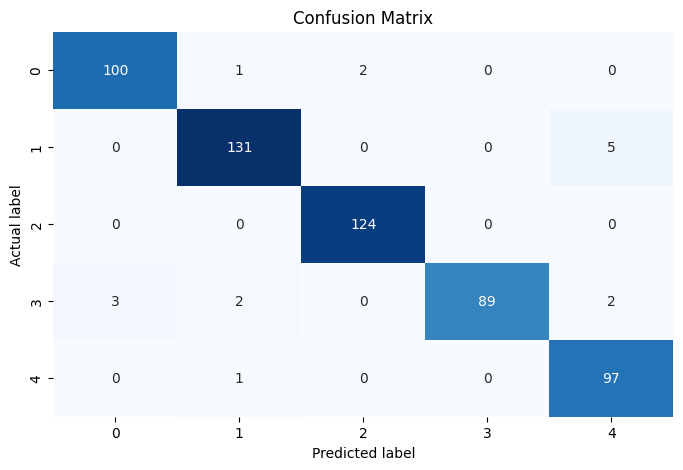

In [25]:
# Plotting the confusion matrix

cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d', cbar = False, cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

getting the classification report 

In [26]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       103
           2       0.97      0.96      0.97       136
           3       0.98      1.00      0.99       124
           4       1.00      0.93      0.96        96
           5       0.93      0.99      0.96        98

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



## Functionalized Code

We are going to wrap the above code into functional son that we can run this for different models

In [27]:
## Model Training

def model_train(model):
    model.fit(X_train, y_train) # Training the model
    y_pred = model.predict(X_val) # Making Predictions
    y_pred_proba = model.predict_proba(X_val)

    return y_pred, y_pred_proba

In [31]:
## Model Evaluation


def model_eval(model, y_pred, y_pred_proba):
    print('------------------------------')

    # Calculating the train and test accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_val, model.predict(X_val))

    print(f'Train Accuracy: {round(train_acc,2)}')
    print(f'Test Accuracy: {round(test_acc,2)}')
    print()

    # Computing the ROC AUC score
    print(f"ROC AUC Score: {round(roc_auc_score(y_val,y_pred_proba,multi_class='ovr'),2)}")
    print()

    # Computing the precision, recall and f1_score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average = 'weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f'Precision: {round(precision,4)}')
    print(f'Recall: {round(recall,4)}')
    print(f'F1 Score: {round(f1,4)}')

    print('------------------------------')
    

Now let us try some few other models 

In [32]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()


model_list = [dt, knn, rf]

In [37]:
# Execute all the model one by one:

for models in model_list:
    print(f'------ Model: {models}-------')

    #Training the model
    y_pred, y_pred_proba = model_train(models)

    #Evaluating the model performance 
    model_eval(models, y_pred, y_pred_proba)

------ Model: DecisionTreeClassifier()-------
------------------------------
Train Accuracy: 1.0
Test Accuracy: 0.83
ROC AUC Score: 0.89
Precision: 0.8279
Recall: 0.8259
F1 Score: 0.8254
------------------------------
------ Model: KNeighborsClassifier()-------
------------------------------
Train Accuracy: 0.96
Test Accuracy: 0.94
ROC AUC Score: 0.99
Precision: 0.9377
Recall: 0.9372
F1 Score: 0.937
------------------------------
------ Model: RandomForestClassifier()-------
------------------------------
Train Accuracy: 1.0
Test Accuracy: 0.95
ROC AUC Score: 1.0
Precision: 0.9537
Recall: 0.9515
F1 Score: 0.9518
------------------------------


Naive bayes performed better in this conetxt and can be used directly without nay hyperparameter tuning.

### Questionaire

In [43]:
df = pd.read_csv('./data/flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


Q1) How many news articles are present in the dataset that we have?

In [44]:
df['Article'].nunique()

2126

There are a total of 2116 news article present in our dataset

Q2) Most of the news articles are from _____ category

In [47]:
df['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

Sports has the hightest number of news article

Q3) Only ___ no. of articles belong to the ‘Technology’ category.
- Ans: 401

Q4) What are Stop Words and why should they be removed from the text data?
- Stop words are common words (such as "the," "is," "and") that are frequently used in language but often carry little meaningful information for natural language processing tasks. Removing stop words from text data helps to reduce the dimensionality of the data, improve computational efficiency, and focus on more significant words. By eliminating stop words, the remaining words can carry more weight and contribute to the understanding of the text's context and semantics, leading to more accurate and meaningful analysis, such as sentiment analysis, topic modeling, and text classification.

Q5) Explain the difference between Stemming and Lemmatization.

- Stemming and lemmatization are techniques used in natural language processing to reduce words to their base or root forms. 

    Stemming reduces words by removing suffixes, resulting in a truncated version of the word. It is a rule-based approach that can produce non-dictionary words.

    Lemmatization, on the other hand, transforms words to their dictionary form, called the lemma, by considering the word's morphological analysis. It ensures the resulting word is valid and meaningful.

    While stemming is faster and simpler, lemmatization produces more accurate and linguistically valid results. Lemmatization is preferred when precise word forms and meaning preservation are crucial, whereas stemming is useful for tasks where a general understanding of the word is sufficient.

Q6) Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?
- The efficiency of Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency) depends on the specific use case and requirements.

    In terms of efficiency in memory usage and computational complexity, BoW is generally considered more efficient. BoW represents text data by creating a matrix of word occurrences, which is straightforward and requires less computation compared to TF-IDF.

    TF-IDF, on the other hand, involves calculating the frequency of terms and their inverse document frequency, which requires additional computations and memory to store the IDF values. This can be more computationally expensive, especially when dealing with a large corpus of documents.

    However, efficiency should not be the sole criterion for choosing between BoW and TF-IDF. The choice depends on the specific task and the goal of the analysis. TF-IDF takes into account the importance of words by considering their occurrence across the document corpus, providing a more nuanced representation of the text data. It is often preferred for tasks like information retrieval, text classification, and document similarity analysis.

    In summary, BoW is more efficient in terms of memory usage and computational complexity, while TF-IDF provides a more meaningful representation of text data considering term importance. The choice between the two techniques should be based on the specific requirements and objectives of the task at hand.

Q7) What’s the shape of train & test data sets after performing a 75:25 split.
- No of rows in the train set is 1668 
- No of rows in the test set is 557

Q8) Which of the following is found to be the best performing model..
a. Random Forest 
b. Nearest Neighbors 
c. Naive Bayes

Ans: Naive Bayes

Q9) According to this particular use case, both precision and recall are equally important. (T/F)
- Ans: False